In [ ]:
import os
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [ ]:
# !gdown --id 11Jm2iSCcTssQwQqLe0wAlGUev8g2fiIM

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=11Jm2iSCcTssQwQqLe0wAlGUev8g2fiIM
From (redirected): https://drive.google.com/uc?id=11Jm2iSCcTssQwQqLe0wAlGUev8g2fiIM&confirm=t&uuid=72f47ea6-a286-4a4e-8b8c-3b0195246b0f
To: /content/dataset.zip
100% 376M/376M [00:07<00:00, 47.5MB/s]


In [ ]:
# import zipfile

# current_dir = os.getcwd()
# local_zip = './dataset.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall()
# zip_ref.close()

In [ ]:
dataset_dir = "dataset"
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


for i in os.listdir(dataset_dir):
    sub_dir = os.listdir(os.path.join(dataset_dir, i))
    for j in sub_dir:
        cat_dir = os.path.join(os.path.join(dataset_dir, i), j)

        if os.path.isdir(cat_dir):
            os.makedirs(os.path.join(train_dir, j), exist_ok=True)
            os.makedirs(os.path.join(test_dir, j), exist_ok=True)

            images = os.listdir(cat_dir)

            train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

            for image in train_images:
                shutil.move(os.path.join(cat_dir, image), os.path.join(train_dir, j, image))
            for image in test_images:
                shutil.move(os.path.join(cat_dir, image), os.path.join(test_dir, j, image))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

Found 52346 images belonging to 283 classes.
Found 4245 images belonging to 283 classes.


In [ ]:
classes_train = train_generator.class_indices
classes_test = test_generator.class_indices
print("Training samples:", train_generator.samples)
print("Testing samples:", test_generator.samples)

Training samples: 52346
Testing samples: 4245


In [ ]:
print("Class Indicate", train_generator.class_indices)

Class Indicate {'ABC Kopi Susu 30g': 0, 'Amani Sip Mixed Berry 120g': 1, 'Astor Chocolate 40g': 2, 'Astor Matcha 40g': 3, 'Astor Vanilla Shake 40g': 4, 'Bear Brand Gold Malt Putih 140ml': 5, 'Bear Brand Gold Teh Putih 140ml': 6, 'Bear Brand Susu Steril 189ml': 7, 'Beng-Beng Share It 95g': 8, 'Bihunku Rasa Soto 55g': 9, 'Biokul Greek Yogurt Blueberry 80g': 10, 'Biokul Greek Yogurt Honey 80g': 11, 'Biokul Greek Yogurt Mango 80g': 12, 'Biokul Greek Yogurt Plain 80g': 13, 'Biokul Greek Yogurt Strawberry 80g': 14, 'Biokul To Go! Leci 80g': 15, 'Biokul To Go! Plain 80g': 16, 'Biokul To Go! Stroberi 80g': 17, 'Biokul Yogurt Apricot 80ml': 18, 'Biokul Yogurt Blueberry 80ml': 19, 'Biokul Yogurt Cherry 80ml': 20, 'Biokul Yogurt Mango 80ml': 21, 'Biokul Yogurt Plain 80ml': 22, 'Biokul Yogurt Strawberry 80ml': 23, 'Buavita Apel 245ml': 24, 'Buavita Jeruk 245ml': 25, 'Buavita Korean White Peach 245ml': 26, 'Buavita Leci 245ml': 27, 'Buavita Mangga 245ml': 28, 'Buavita jambu 245ml': 29, 'Carnation K

In [ ]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(classes_train), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [ ]:
epochs = 20
history = model.fit(train_generator,
          epochs=epochs,
          validation_data=test_generator,
          verbose=1)

Epoch 1/20
1636/1636 [==============================] - 568s 343ms/step - loss: 3.7685 - accuracy: 0.1916 - val_loss: 1.9818 - val_accuracy: 0.4867
Epoch 2/20
1636/1636 [==============================] - 560s 342ms/step - loss: 1.2640 - accuracy: 0.6407 - val_loss: 1.5934 - val_accuracy: 0.6193
Epoch 3/20
1636/1636 [==============================] - 564s 344ms/step - loss: 0.6911 - accuracy: 0.7862 - val_loss: 0.7972 - val_accuracy: 0.7736
Epoch 4/20
1636/1636 [==============================] - 554s 338ms/step - loss: 0.4879 - accuracy: 0.8454 - val_loss: 0.7168 - val_accuracy: 0.7974
Epoch 5/20
1636/1636 [==============================] - 564s 345ms/step - loss: 0.3987 - accuracy: 0.8699 - val_loss: 0.4356 - val_accuracy: 0.8605
Epoch 6/20
1636/1636 [==============================] - 561s 343ms/step - loss: 0.3339 - accuracy: 0.8902 - val_loss: 0.5720 - val_accuracy: 0.8429
Epoch 7/20
1636/1636 [==============================] - 563s 344ms/step - loss: 0.2895 - accuracy: 0.9051 - val_

NameError: name 'history' is not defined

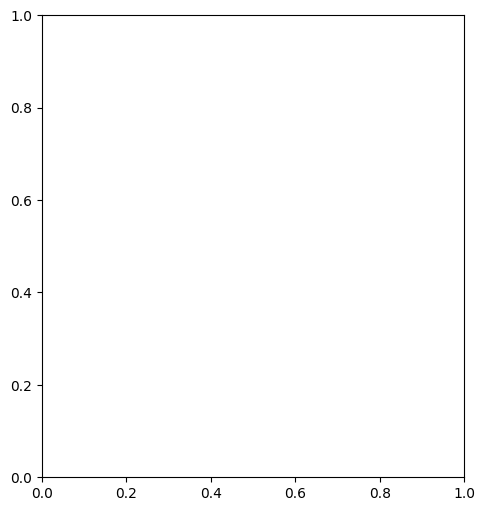

In [ ]:
# Plot the accuracy and loss graphs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Saving 8f8fd61e-653b-4fb0-9bf4-cab96d870f92.jpg to 8f8fd61e-653b-4fb0-9bf4-cab96d870f92.jpg
User uploaded file "8f8fd61e-653b-4fb0-9bf4-cab96d870f92.jpg" with length 84764 bytes
1/1 [==============================] - 0s 17ms/step


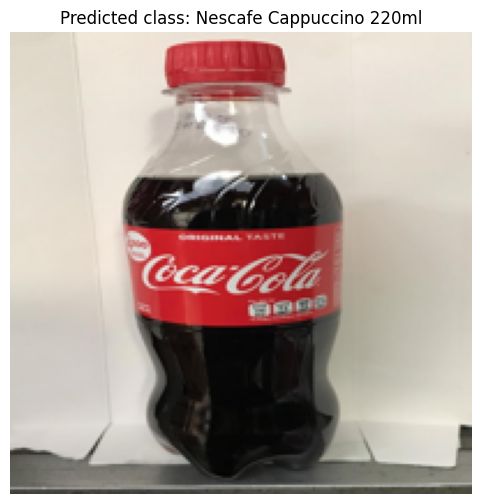

In [ ]:
# Test the model on a new image
import io
from PIL import Image
from google.colab.files import upload
uploaded = upload()

for filename in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded[filename])))

    # Load the uploaded image
    image = Image.open(io.BytesIO(uploaded[filename]))

    # Preprocess the image
    image = image.resize((200, 200))
    image_array = np.array(image) / 255.0
    image_tensor = np.expand_dims(image_array, axis=0)

    # Make predictions
    predictions = model.predict(image_tensor)
    predicted_class = np.argmax(predictions[0])

    # Display the image with the predicted label
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Predicted class: {list(classes_train.keys())[list(classes_train.values()).index(predicted_class)]}")
    plt.axis('off')
    plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
import os
import tensorflow as tf
import tensorflow.lite as tflite

print(f"Current working directory: {os.getcwd()}")

try:
    model = tf.keras.models.load_model('model.h5')
    print("Model loaded successfully")
except Exception as e:
    print(f"Error loading model: {e}")

try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    print("Model converted to TFLite successfully")
except Exception as e:
    print(f"Error converting model to TFLite: {e}")

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
    print("TFLite model saved successfully")